In [33]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [34]:
# IMporting the dataset
dataset =pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\50_Startups.csv')

In [35]:
dataset.shape

(50, 5)

In [36]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

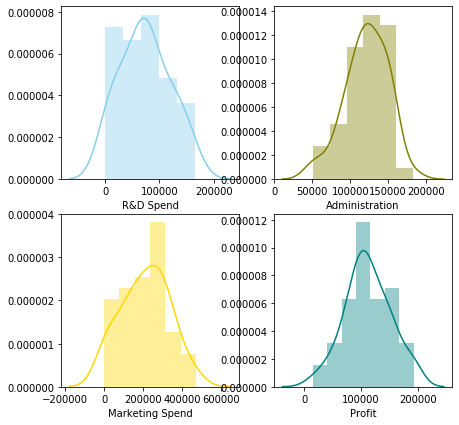

In [38]:
f, axes = plt.subplots(2, 2, figsize=(7,7))
sb.distplot( dataset["R&D Spend"] , color='skyblue', ax=axes[0, 0])
sb.distplot( dataset["Administration"] , color = 'olive', ax=axes[0, 1])
sb.distplot( dataset["Marketing Spend"] , color='gold', ax=axes[1,0])
sb.distplot( dataset["Profit"] , color='teal', ax=axes[1,1])

In [39]:
datset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


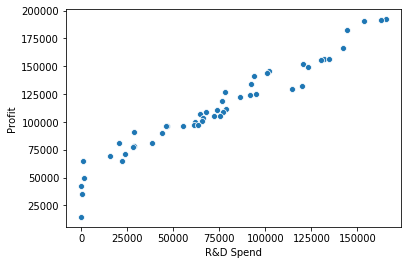

In [40]:
sb.scatterplot(dataset["R&D Spend"] , dataset["Profit"])

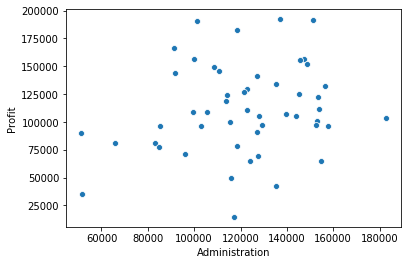

In [41]:
sb.scatterplot(dataset["Administration"] , dataset["Profit"])

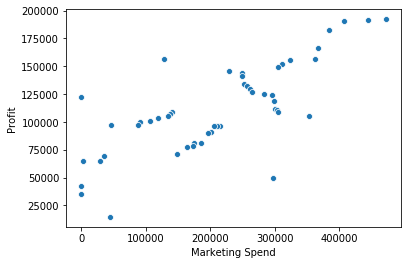

In [42]:
sb.scatterplot(dataset["Marketing Spend"] , dataset["Profit"])

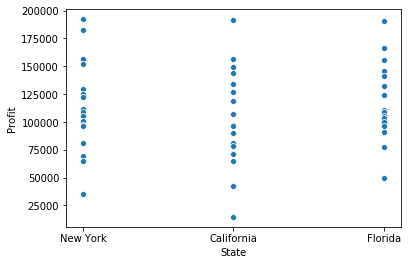

In [43]:
sb.scatterplot(dataset["State"] , dataset["Profit"])

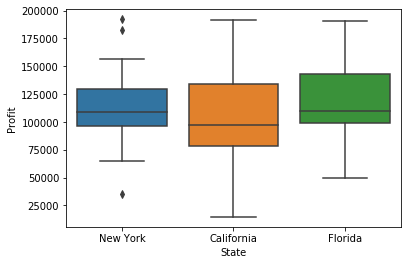

In [44]:
sb.boxplot(dataset["State"] , dataset["Profit"])

In [45]:
np.corrcoef(dataset['Marketing Spend'],dataset['Profit'])[0,1]

0.7477657217414767

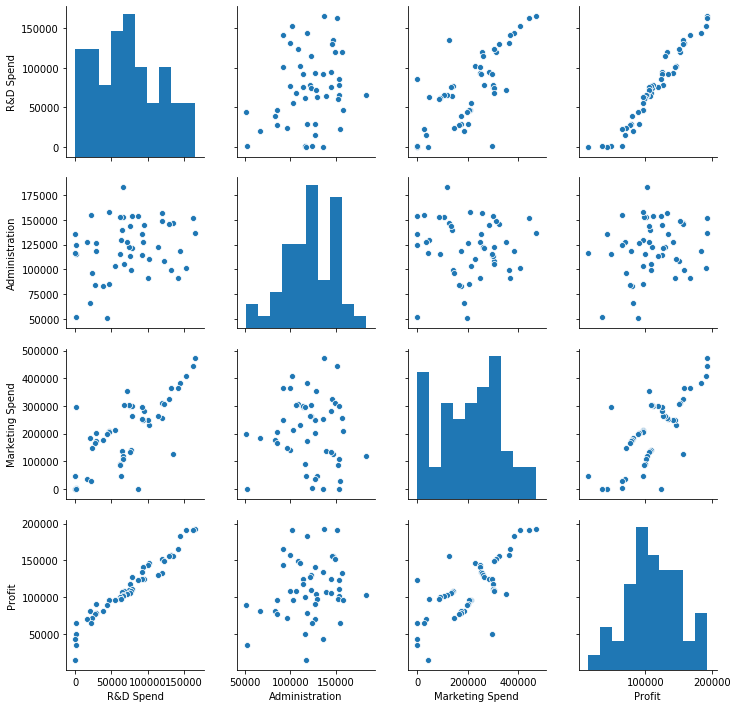

In [58]:
sb.pairplot(dataset)

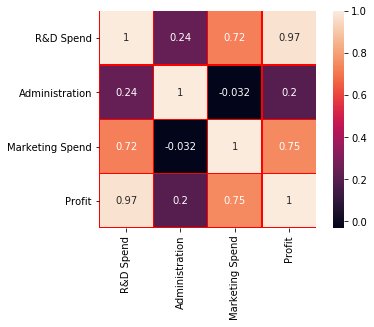

In [60]:
#Step 3 - Plot the Seaborn Heatmap
sb.heatmap(dataset.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)


In [72]:
#Check for Null/Missing Values
dataset.isnull().sum() # So no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [74]:
#Change Categorical Feature into Dummy Variables
# handlign Dummy Variables
dummy = pd.get_dummies(dataset["State"])

In [75]:
dataset = pd.concat([dummy, dataset], axis=1)

In [76]:
dataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,0,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,0,1,0,142107.34,91391.77,366168.42,Florida,166187.94


In [78]:
# After adding dummy variable remove Gender Column
dataset.drop(["State"], inplace=True, axis=1)

In [79]:
dataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


## SPLIT DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES

In [84]:
# lets split our data into dependent and independent dataset
x = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, -1:].values

## Splitting dataset into Training and test dataset

In [85]:
# split into train and test
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Correlation Table

In [88]:
# Lets check the correlation between variables
dataset.corr()
# from below table we can see R&D Spend and Marketing Spend both have good affect in Profit.

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


## VISUALISATION

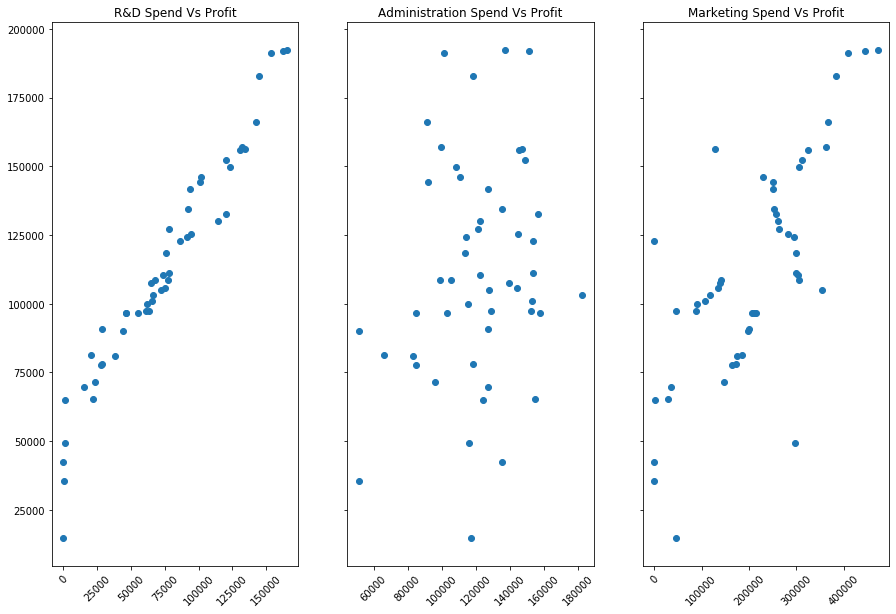

In [89]:
# Lets plot all the three features together
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 10))

ax1.scatter(dataset["R&D Spend"], dataset.Profit)
ax1.set_title('R&D Spend Vs Profit')

ax2.scatter(dataset["Administration"], dataset.Profit)
ax2.set_title('Administration Spend Vs Profit')

ax3.scatter(dataset["Marketing Spend"], dataset.Profit)
ax3.set_title('Marketing Spend Vs Profit')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.show()

## REGRESSION OBJECT

In [90]:
# So we can both R&D & Marketing fetures are related to Profit linearly. So we can generate a multi regression
# model using these two
from sklearn.linear_model import LinearRegression

In [91]:
regressor = LinearRegression() # Regression object created

## TRAINING MODEL

In [93]:
regressor.fit(x_train, y_train) # Training model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## PREDICT DATA

In [96]:
y_pred = regressor.predict(x_test) # predicting
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230166],
       [ 67851.69209676],
       [ 98791.73374686],
       [113969.43533013],
       [167921.06569551]])

## Printing Real and Predicted values

In [97]:
print("="*40)
print("Real Values -------> Predicted Values")
print("="*40)
print("\n")
for item in range(len(y_test)):
    print(str(y_test[item]) + " -------> " +str(y_pred[item]))

Real Values -------> Predicted Values


[103282.38] -------> [103015.20159796]
[144259.4] -------> [132582.27760816]
[146121.95] -------> [132447.73845174]
[77798.83] -------> [71976.09851258]
[191050.39] -------> [178537.48221055]
[105008.31] -------> [116161.24230166]
[81229.06] -------> [67851.69209676]
[97483.56] -------> [98791.73374686]
[110352.25] -------> [113969.43533013]
[166187.94] -------> [167921.06569551]


In [98]:
x_test_new = [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 200000,
        300000, 150000]]

In [99]:
regressor.predict(x_test_new)

array([[213303.85835725]])

## CHECKING THE ACCURACY  USING R^2 Score

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9347068473282303

In [106]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\Parul\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Parul\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [107]:
X.astype(int)
y.astype(int)

array([[192261],
       [191792],
       [191050],
       [182901],
       [166187],
       [156991],
       [156122],
       [155752],
       [152211],
       [149759],
       [146121],
       [144259],
       [141585],
       [134307],
       [132602],
       [129917],
       [126992],
       [125370],
       [124266],
       [122776],
       [118474],
       [111313],
       [110352],
       [108733],
       [108552],
       [107404],
       [105733],
       [105008],
       [103282],
       [101004],
       [ 99937],
       [ 97483],
       [ 97427],
       [ 96778],
       [ 96712],
       [ 96479],
       [ 90708],
       [ 89949],
       [ 81229],
       [ 81005],
       [ 78239],
       [ 77798],
       [ 71498],
       [ 69758],
       [ 65200],
       [ 64926],
       [ 49490],
       [ 42559],
       [ 35673],
       [ 14681]])